In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler

1. **Classification Problem Identification:**
This dataset collects indicators from patients in the hospital over a two-month period, which can be used to analyze the physical condition of different patients according to the model and to analyze and predict what physical indicators are most useful for obtaining ckd, using the presence or absence of ckd as the goal.

In [3]:
ckd = pd.read_csv("kidney_disease.csv")
ckd.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
ckd_cld = ckd.dropna(axis = 0)
ckd_cld.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

(2) transformation

In [5]:
cat = ['pc', 'pcc',"rbc","ba","htn","dm","cad","appet","pe","ane"]
for col in cat:
    ckd_cld[col] = pd.Categorical(ckd_cld[col]).codes


ckd_all=ckd_cld
cat_all = ['pc', 'pcc',"rbc","ba","htn","dm","cad","appet","pe","ane","classification"]
for col in cat_all:
    ckd_all[col] = pd.Categorical(ckd_all[col]).codes

ckd_all.dtypesdtypes()

/var/folders/wx/62jz9c9d78d6c5tnlssr8sk80000gn/T/ipykernel_56070/3701714311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ckd_cld[col] = pd.Categorical(ckd_cld[col]).codes
/var/folders/wx/62jz9c9d78d6c5tnlssr8sk80000gn/T/ipykernel_56070/3701714311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ckd_cld[col] = pd.Categorical(ckd_cld[col]).codes
/var/folders/wx/62jz9c9d78d6c5tnlssr8sk80000gn/T/ipykernel_56070/3701714311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

AttributeError: 'DataFrame' object has no attribute 'dtypesdtypes'

TypeError: Image data of dtype object cannot be converted to float

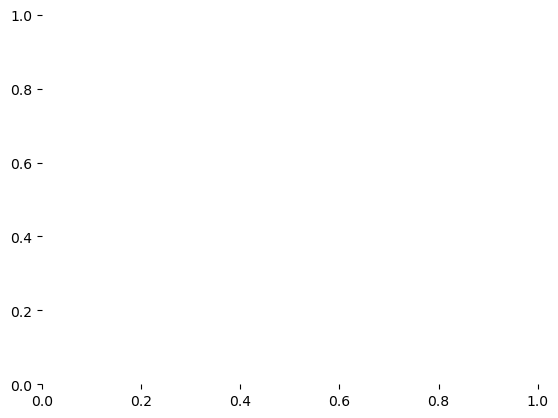

In [6]:
sns.heatmap(ckd_all)

(3)

In [7]:
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


The dataset is from 
There are 400 observations and 25 variables in the dataset.


(4)

(5) Missing Value Analysis and Handling

We dropped all the missing values in the dataset

In [8]:
ckd_cld = ckd.dropna(axis = 0)
ckd_cld.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

(6)

(7)

In [ ]:
X = ckd_cld.drop(['Sales', 'High'], axis=1)
y = ckd_cld.High